### Step 1:Import all the libraries

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Step 2:Load and Review the Data

In [3]:
#loading the data set
df=pd.read_csv("HousePrices.csv")
df.sample(5)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
1559,1560,30,RM,85.0,4229,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
63,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal,140000
59,60,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,124900
881,882,50,RL,44.0,13758,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,187500
576,577,50,RL,52.0,6292,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,145000


In [4]:
df.shape

(2073, 81)

### Step 3:Explore the Data

In [5]:
# obtaining description for the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2073.0,916.132176,493.014670,1.0,519.0,932.0,1302.0,1820.0
Dwell_Type,2073.0,60.556199,159.924810,20.0,20.0,50.0,70.0,7080.0
LotFrontage,1753.0,72.056475,27.987475,21.0,60.0,70.0,83.0,313.0
LotArea,2073.0,10717.853353,9215.982306,1300.0,7620.0,9492.0,11601.0,215245.0
OverallQual,2073.0,6.233478,1.517115,1.0,5.0,6.0,7.0,10.0
OverallCond,2073.0,5.835022,1.360214,1.0,5.0,5.0,7.0,9.0
YearBuilt,2073.0,1969.445731,30.222647,1872.0,1950.0,1971.0,1999.0,2010.0
YearRemodAdd,2073.0,1986.617463,20.432694,1950.0,1970.0,1995.0,2004.0,2023.0
MasVnrArea,2059.0,101.875668,179.169217,0.0,0.0,0.0,161.5,1600.0
BsmtFinSF1,2073.0,437.949349,448.051119,0.0,0.0,381.0,708.0,5644.0


In [6]:
df.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object

In [7]:
# Description for all columns
pd.set_option('display.max_rows',None)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2073,NaN,NaN,NaN,916.132,493.015,1,519,932,1302,1820
Dwell_Type,2073,NaN,NaN,NaN,60.5562,159.925,20,20,50,70,7080
Zone_Class,2073,5,RL,1611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1753,NaN,NaN,NaN,72.0565,27.9875,21,60,70,83,313
LotArea,2073,NaN,NaN,NaN,10717.9,9215.98,1300,7620,9492,11601,215245
Road_Type,2073,2,Pave,2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,129,2,Grvl,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property_Shape,2073,4,Reg,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,2073,4,Lvl,1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2073,2,AllPub,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking

In [9]:
df.isnull().sum()

Id                        0
Dwell_Type                0
Zone_Class                0
LotFrontage             320
LotArea                   0
Road_Type                 0
Alley                  1944
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType               14
MasVnrArea               14
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 59
BsmtCond                 59
BsmtExposure             61
BsmtFinType1             59
BsmtFinSF1                0
BsmtFinType2        

#### Data manipulation and wrangling

In [10]:
df["Alley"]=df.Alley.replace(np.nan,"NA")

In [11]:
df.MasVnrType=df.MasVnrType.replace(np.nan,"none")

In [12]:
df.BsmtQual=df.BsmtQual.replace(np.nan,"NA")

In [13]:
df.BsmtCond=df.BsmtCond.replace(np.nan,"NA")

In [14]:
df.BsmtExposure=df.BsmtExposure.replace(np.nan,"NA")

In [15]:
df.BsmtFinType1=df.BsmtFinType1.replace(np.nan,"NA")

In [16]:
df.BsmtFinSF2=df.BsmtFinSF2.replace(np.nan,df.BsmtFinSF2.mean())

In [17]:
df.BsmtFinType2=df.BsmtFinType2.replace(np.nan,"NA")

In [18]:
df.FireplaceQu=df.FireplaceQu.replace(np.nan,"NA")

In [19]:
df.GarageType=df.GarageType.replace(np.nan,"NA")

In [20]:
df.GarageFinish=df.GarageFinish.replace(np.nan,"NA")

In [21]:
df.GarageQual=df.GarageQual.replace(np.nan,"NA")

In [22]:
df.GarageCond=df.GarageCond.replace(np.nan,"NA")

In [23]:
df.MiscFeature=df.MiscFeature.replace(np.nan,"NA")

In [24]:
df.Fence=df.Fence.replace(np.nan,"NA")

In [25]:
df.PoolQC=df.PoolQC.replace(np.nan,"NA")

In [26]:
df.LotArea=df.LotArea.replace(np.nan,df.LotArea.mean())

In [27]:
df.LotFrontage=df.LotFrontage.replace(np.nan,df.LotFrontage.mean())

In [28]:
df.GarageYrBlt=df.GarageYrBlt.replace(np.nan,df.GarageYrBlt.mean())

In [29]:
df.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [30]:
df.isnull().sum()

Id                      0
Dwell_Type              0
Zone_Class              0
LotFrontage             0
LotArea                 0
Road_Type               0
Alley                   0
Property_Shape          0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
Dwelling_Type           0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea             14
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF 

In [31]:
df.MasVnrArea=df.MasVnrArea.replace(np.nan,df.MasVnrArea.mean())

In [32]:
df.Electrical=df.Electrical.replace(np.nan,df.Electrical.mode()[0])

In [33]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

In [34]:
df.shape

(2073, 81)

In [35]:
df.isnull().sum()

Id                     0
Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0


<AxesSubplot:>

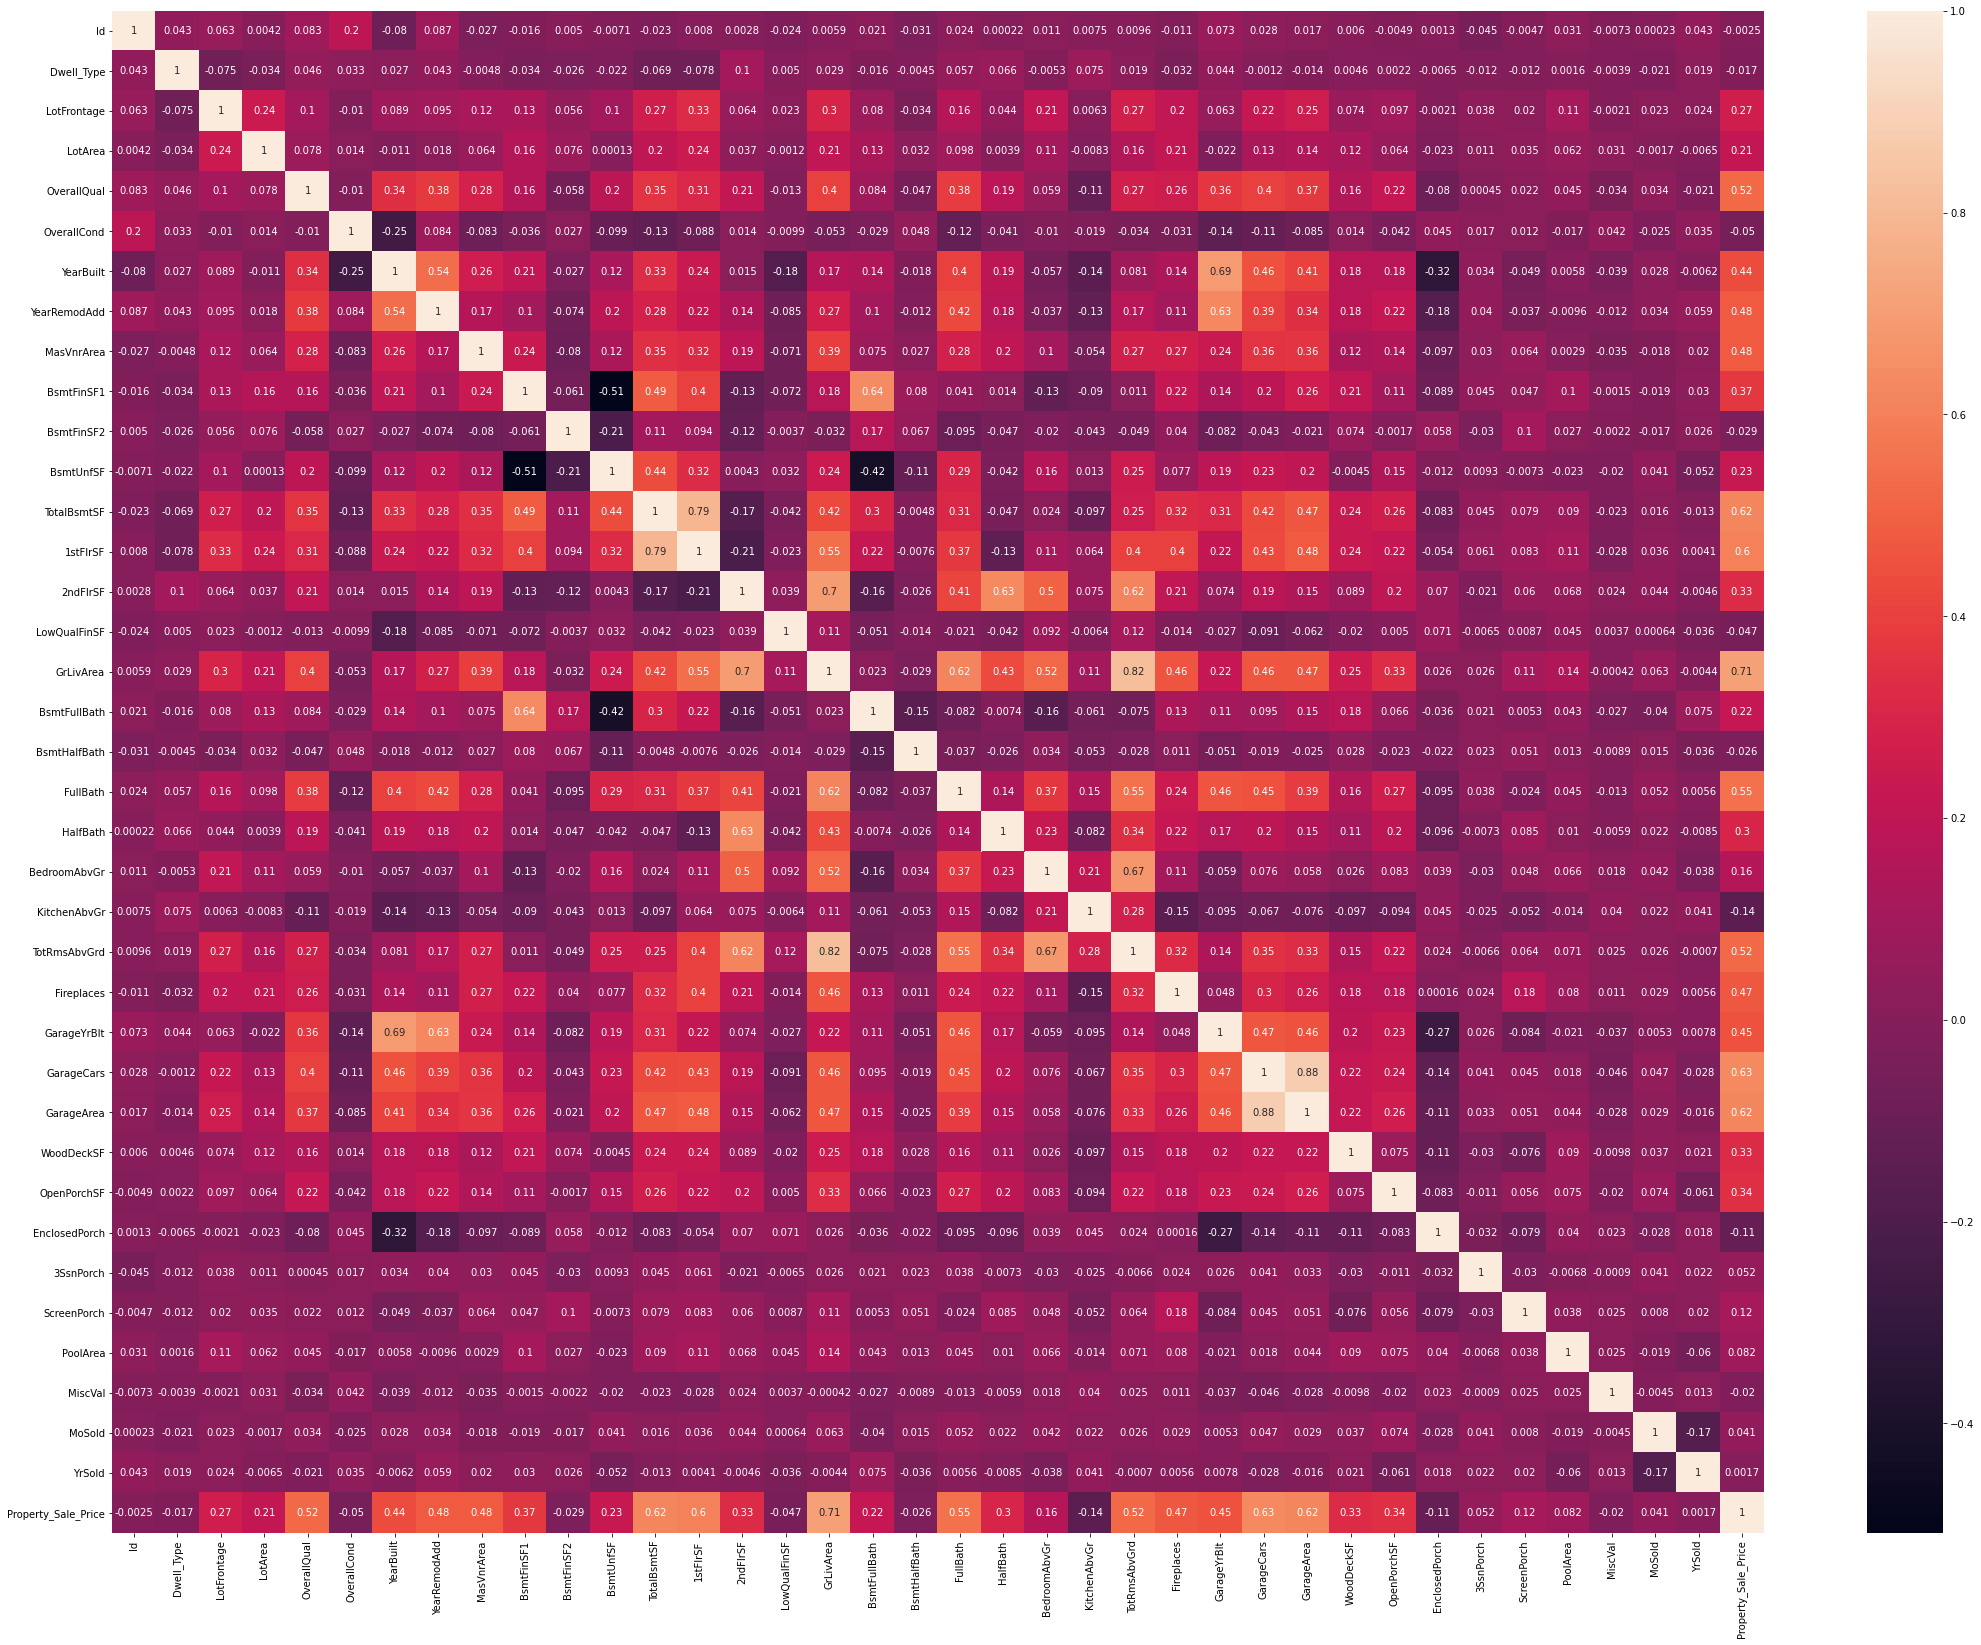

In [36]:
f, ax = plt.subplots(figsize=(37, 28))
sns.heatmap(df.corr(),annot=True)

In [37]:
df.drop(["Id"],axis=1,inplace=True)

In [38]:
df.Alley.value_counts()

NA      1944
Grvl      72
Pave      57
Name: Alley, dtype: int64

In [39]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

### Step 4:Training Data and Testing Data Split

In [51]:
X = df.drop(["Property_Sale_Price"], axis=1)
y = df["Property_Sale_Price"]

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,X.columns)])

transformed_X = transformer.fit_transform(X)
transformed_X

<2073x7980 sparse matrix of type '<class 'numpy.float64'>'
	with 163767 stored elements in Compressed Sparse Row format>

In [42]:
X_train, X_test , y_train, y_test = train_test_split(transformed_X, y, test_size=0.25, random_state=0)

### Step 5: Fit the model with the Training Data

In [61]:
reg = RandomForestRegressor(n_estimators=100,max_depth=8,bootstrap=True,verbose=1,n_jobs=-1,max_leaf_nodes=29)
reg.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomForestRegressor(max_depth=8, max_leaf_nodes=29, n_jobs=-1, verbose=1)

In [62]:
reg.score(X_train,y_train),reg.score(X_test,y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.8648151570326298, 0.8306044963385446)

In [1]:
# with scaling

In [116]:
from sklearn.preprocessing import RobustScaler
st_x= RobustScaler(with_centering=False)    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [105]:
X_train.shape

(1554, 7980)

In [117]:
reg = RandomForestRegressor(n_estimators=100,max_depth=8,bootstrap=True,verbose=1,n_jobs=-1,max_leaf_nodes=29)
reg.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestRegressor(max_depth=8, max_leaf_nodes=29, n_jobs=-1, verbose=1)

In [118]:
reg.score(x_train,y_train),reg.score(x_test,y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.86532454756678, 0.8293422281013845)

In [120]:
linreg = LinearRegression(fit_intercept=False,n_jobs=-1,normalize=True)
linreg.fit(X_train,y_train)

LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)

In [121]:
linreg.score(X_train,y_train),linreg.score(X_test,y_test)

(0.9999999999846969, 0.90256214226545)

Even though linear regression got 99 percent on training, it only got 90 in testing, therefor it is a overfitting model. So random forest model gives the best score for this case.